# TBC
- Linearity plots for features have correlation larger than 0.5
- Hue to pairplot
- use ovo only, not oversample the dataset
- metric change to precision


# Data import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import raw dataset
import pandas as pd

metadata = pd.read_csv('/content/drive/MyDrive/Movies/movies_metadata.csv')


<ipython-input-2-bcf7ba7d375d>:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/content/drive/MyDrive/Movies/movies_metadata.csv')


In [ ]:
# display all columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

# Data preparation

## Metadata
- Take a look at the overview dataset
- Clean each column
- Filter inappropriate values

In [ ]:
# Take a look at what this dataset looks like
metadata.head(2)

,Unnamed: 0,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
# Check the data type
metadata.dtypes

Unnamed: 0                 int64
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
# Check the numbers of null values for each column
metadata.isnull().sum()

Unnamed: 0                   0
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### genres
genres is an important categorical feature, we will convert in into numericals

#### genres explode

In [ ]:
# Check the structure of a genres cell
eval(metadata.genres[0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [ ]:
# Extract the genres information only
genres_ = [[i['name'] for i in eval(metadata['genres'][j])] for j in range(metadata.shape[0])]
genres_[:5]

[['Animation', 'Comedy', 'Family'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

In [ ]:
# Replace the genres feature with the cleaned one
metadata.drop(['genres'],axis=1,inplace=True)
metadata['genres'] = genres_
metadata.head(2)

,Unnamed: 0,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"


In [ ]:
# Separate the genres feature and free the multi-values genres cell by expanding the ids
genres = metadata[['id','genres']]
genres_explode = genres.explode('genres')
genres_explode.head()

,id,genres
0,862,Animation
0,862,Comedy
0,862,Family
1,8844,Adventure
1,8844,Fantasy


#### Dummy the genre feature

In [ ]:
# Create a helper column in order to pivot the values later
genres_explode['tmp'] = 1
genres_explode.head()

,id,genres,tmp
0,862,Animation,1
0,862,Comedy,1
0,862,Family,1
1,8844,Adventure,1
1,8844,Fantasy,1


In [ ]:
# Dummy the genres, fill the non-existing cell with 0
pivot = genres_explode.pivot_table('tmp','id','genres',fill_value=0)
genres_dummies = pd.DataFrame(pivot.to_records())
genres_dummies.head(10)

,id,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,100,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10000,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,100010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,100017,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,10002,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,100024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,10003,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
8,100032,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,100033,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Merge the dummied genres with the metadata to form the main dataset
metadata_d = pd.merge(metadata,genres_dummies,on='id',how='left')
metadata_d.head(3)

,Unnamed: 0,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
metadata = metadata_d.copy()

### belong_to_collection

In [ ]:
# switch this belong_to_collection values to int 1/0
metadata['belongs_to_collection'].fillna(0,inplace=True)
collections = metadata['belongs_to_collection'].copy()
collections[collections != 0 ] = 1
metadata['belongs_to_collection'] = collections
metadata['belongs_to_collection'] = metadata['belongs_to_collection'].astype('int64')
metadata.head(2)

,Unnamed: 0,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,False,1,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,False,0,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Release date
separete release date into release year and release month

In [ ]:
metadata['release_date'] = pd.to_datetime(metadata['release_date'],errors = 'coerce')
metadata['release_year'] = metadata['release_date'].dt.year
metadata['release_month'] = metadata['release_date'].dt.month

### numerical feature selection
Besides all non-numerical features, we'll keep genres, belongs_to_collection and release data. Genres is an important feature for movies, belongs_to_collection and release date can convert to numerical data easily.

In [ ]:
metadata.columns

Index(['Unnamed: 0', 'adult', 'belongs_to_collection', 'budget', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'genres', 'Action', 'Adventure',
       'Animation', 'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'GoHands', 'History', 'Horror', 'Mardock Scramble Production Committee',
       'Music', 'Mystery', 'Odyssey Media', 'Pulser Productions',
       'Rogue State', 'Romance', 'Science Fiction', 'Sentai Filmworks',
       'TV Movie', 'Telescene Film Group Productions', 'The Cartel',
       'Thriller', 'Vision View Entertainment', 'War', 'Western',
       'release_year', 'release_month'],
      dtype='object')

In [ ]:
# we'll predict the movie ratings before its release, so we'll delete revenue for our prediction
meta = metadata[['title','id','belongs_to_collection','budget',#'revenue',
                 'runtime','vote_average','vote_count',#'genres',
                 'Action', 'Adventure',
       'Animation', 'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'GoHands', 'History', 'Horror', 'Mardock Scramble Production Committee',
       'Music', 'Mystery', 'Odyssey Media', 'Pulser Productions',
       'Rogue State', 'Romance', 'Science Fiction', 'Sentai Filmworks',
       'TV Movie', 'Telescene Film Group Productions', 'The Cartel',
       'Thriller', 'Vision View Entertainment', 'War', 'Western','release_year', 'release_month']].copy()
meta.head(2)

,title,id,belongs_to_collection,budget,runtime,vote_average,vote_count,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western,release_year,release_month
0,Toy Story,862,1,30000000,81.0,7.7,5415.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,10.0
1,Jumanji,8844,0,65000000,104.0,6.9,2413.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,12.0


### Drop null values/ duplicated values/ invalid values

In [ ]:
# drop overall duplicates and drop duplicated id feature and keep the first one
meta_unique = meta.drop_duplicates().drop_duplicates(subset='id',keep='first')

# drop nulls
meta_no_nulls = meta_unique.dropna()

# filter vote_count<50 and budget=0
meta_no_nulls['budget'] = meta_no_nulls['budget'].astype('int')
meta_clean = meta_no_nulls[(meta_no_nulls['vote_count']>50)&(meta_no_nulls['budget']>0)]

<ipython-input-19-3029fa1f7164>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_no_nulls['budget'] = meta_no_nulls['budget'].astype('int')


In [ ]:
meta_clean.shape

(5343, 41)

### Eliminate zero-variance features from genres
After filtering, some genres don't exist, eliminate them before EDA

In [ ]:
# find the features whose all values are 0
all_null_features = meta_clean.select_dtypes(include=['float64','int64']).columns[meta_clean.select_dtypes(include=['float64','int64']).sum() == 0]

In [ ]:
# drop these features
print(len(meta_clean.columns))
meta_concise = meta_clean.drop(all_null_features,axis=1).reset_index(drop=True)
print(len(meta_concise.columns))

41
28


# Data Understanding by EDA
- high/low rating movies
- distribution
- correlation-heatmap/pairplot

## Top/bottom 10 rated movies
Check if the best/worst movies are intuitively meet our expectations

In [ ]:
# Top 10 rated movies
meta_concise[['title','vote_average']].sort_values(by=['vote_average'],ascending=False).head(10)

,title,vote_average
2599,Dilwale Dulhania Le Jayenge,9.1
4973,Human,8.6
118,The Shawshank Redemption,8.5
276,The Godfather,8.5
193,Schindler's List,8.3
1101,Fight Club,8.3
4555,Whiplash,8.3
415,Once Upon a Time in America,8.3
411,The Godfather: Part II,8.3
409,Psycho,8.3


In [ ]:
# Bottom 10 rated movies
meta_concise[['title','vote_average']].sort_values(by=['vote_average'],ascending=True).head(10)

,title,vote_average
2405,Manos: The Hands of Fate,2.0
2088,House of the Dead,2.8
3328,Dragonball Evolution,2.9
4777,Mega Piranha,3.0
1304,Battlefield Earth,3.0
4168,Hellraiser: Revelations,3.0
3198,Disaster Movie,3.1
2511,Alone in the Dark,3.1
3313,Far Cry,3.1
4486,BloodRayne: Deliverance,3.2


## Distribution by Histogram

In [ ]:
# select the numerical columns
meta_numerical = meta_concise.select_dtypes(include=['float64','int64'])


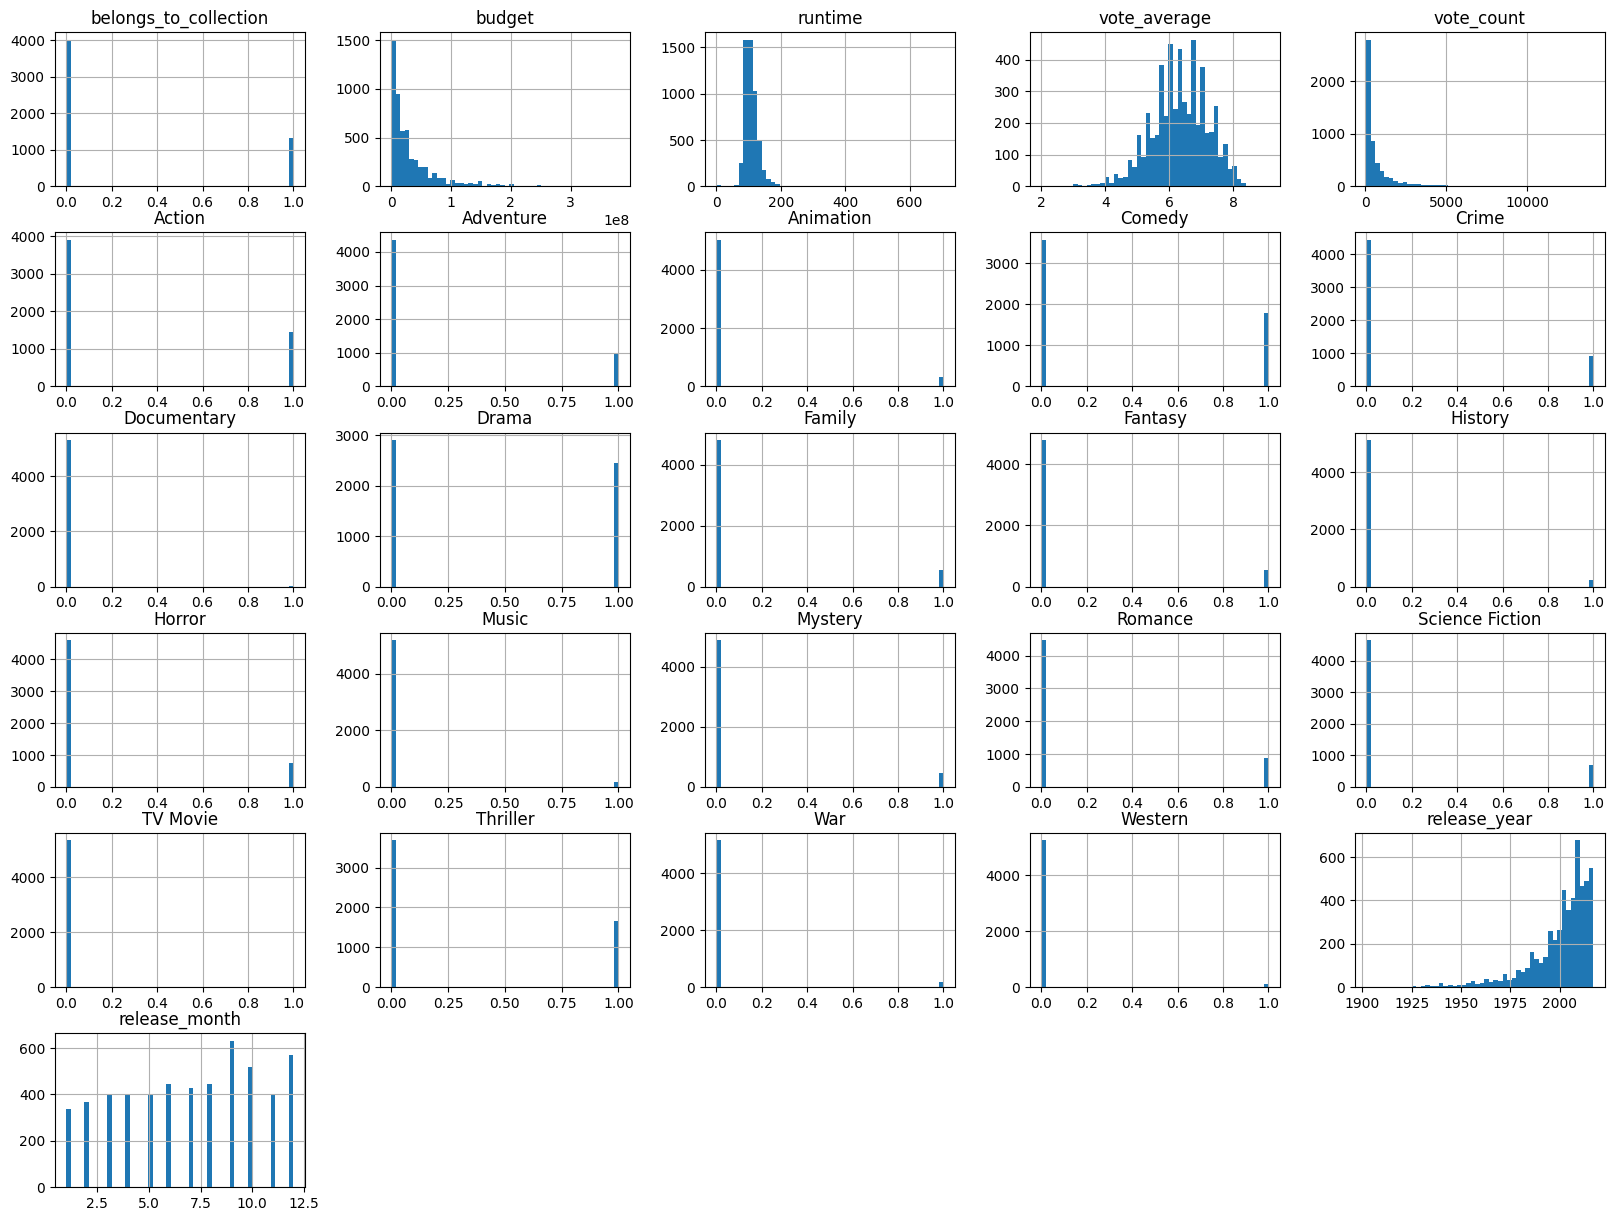

In [ ]:
# check distribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
meta_numerical.hist(bins=50, figsize=(20,15))
plt.title('Distribution of each feature')
plt.show()

We can see from above distributions,
- some expanded new features have low variance: Documentary, TV Movie. We'll set a threshold 95% to eliminate these features later in feature selection.
- most of the features are not normally distributed, and we have high dimentional dataset, so we choose k-means to detect and eliminate the outliers later.

## Correlation by Heatmap

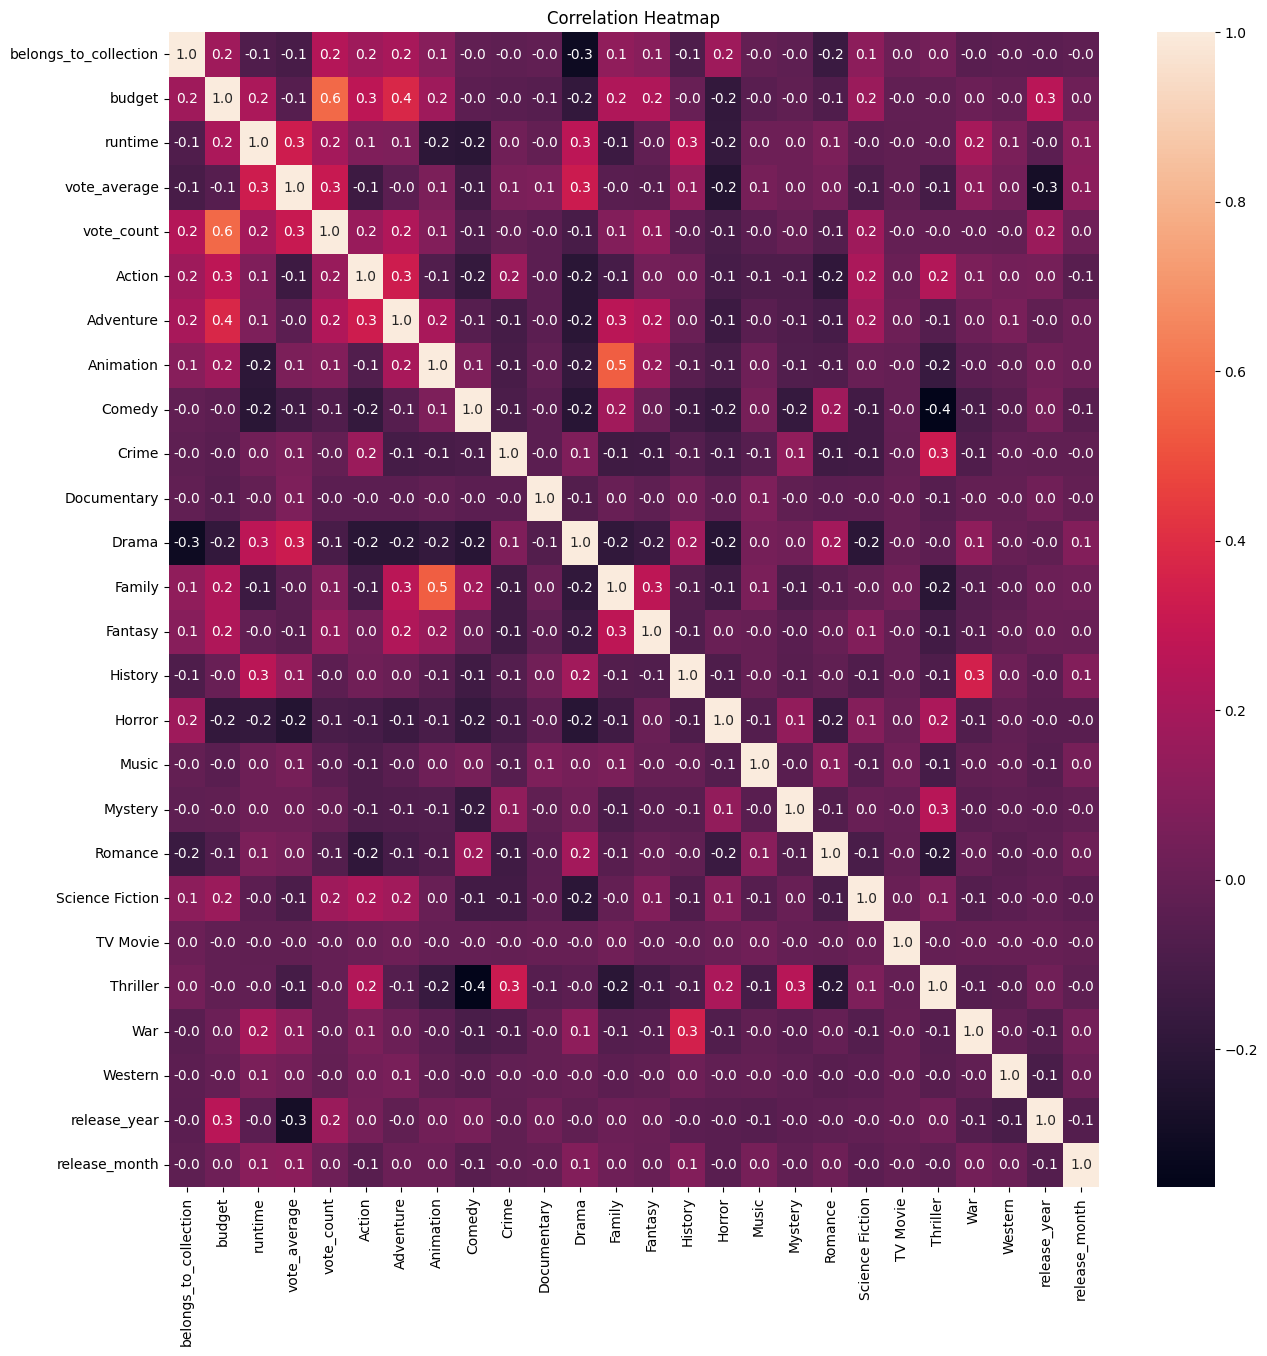

In [ ]:
# check correlation coefficient

plt.figure(figsize=(15,15))
sns.heatmap(meta_numerical.corr(),annot=True,fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

these features have relatively high correlation:\
budget vs vote_count: 0.6\
Family & Animation : 0.5

## Correlation details by Pairplot

In [ ]:
meta_numerical.columns

Index(['belongs_to_collection', 'budget', 'runtime', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'release_year', 'release_month'],
      dtype='object')

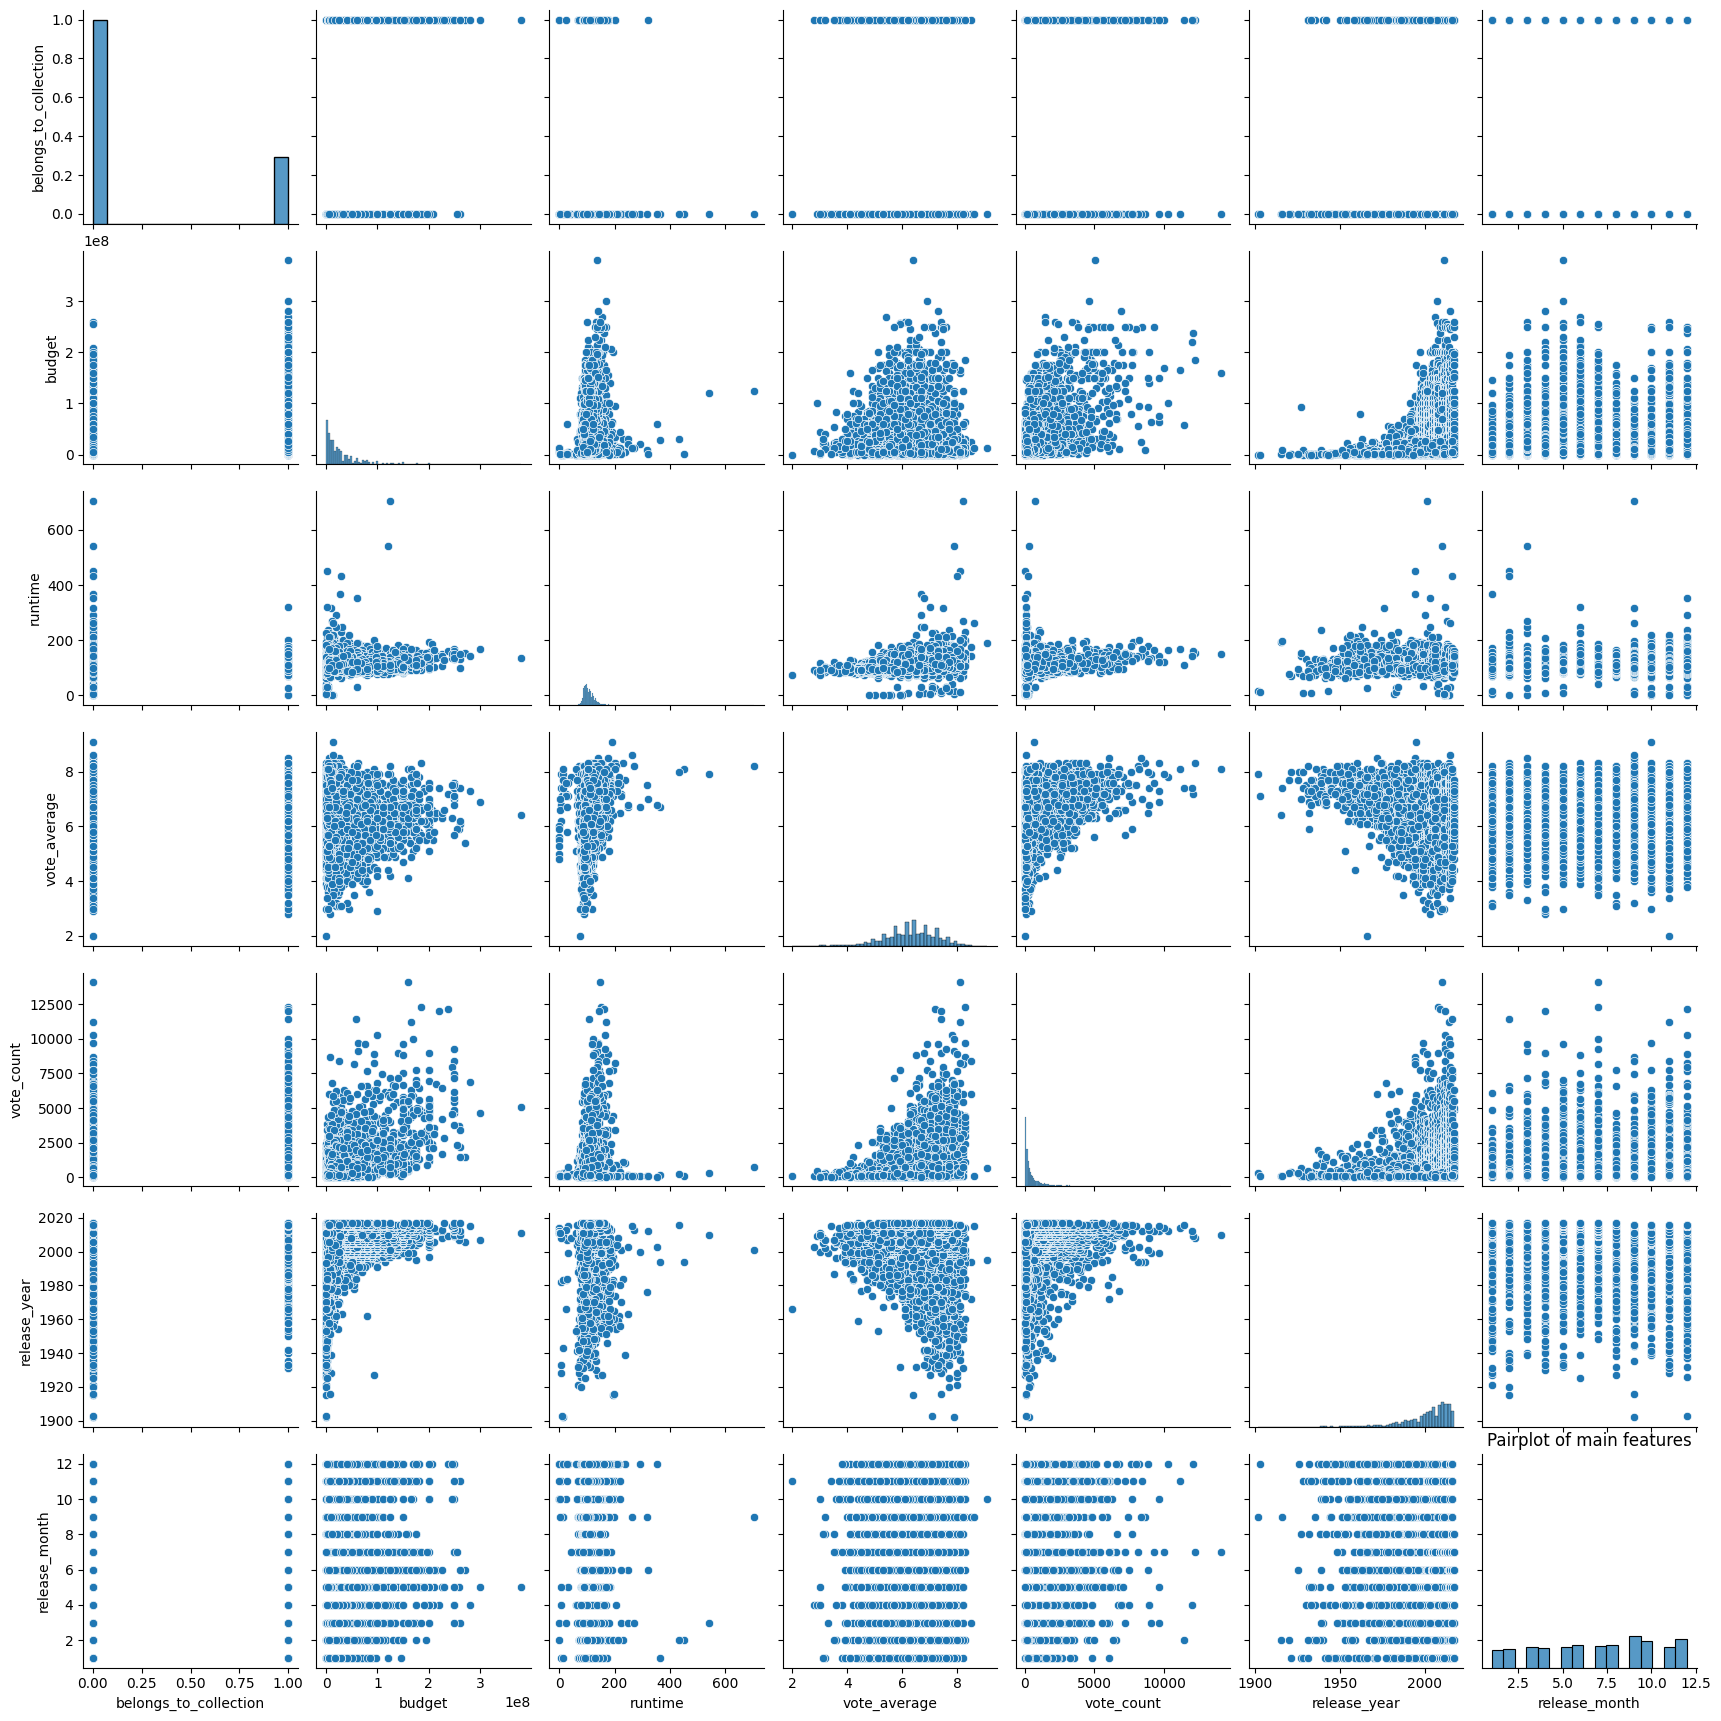

In [ ]:
# check linearity, we can see the correlation in heatmap, here we check the scatter plot of each pair of features except the expanded ones, because they're computational expensive and dummy values
meta_pairplot = meta_numerical[['belongs_to_collection', 'budget', 'runtime', 'vote_average','vote_count', 'release_year', 'release_month']]
sns.pairplot(meta_pairplot)
plt.title('Pairplot of main features')
plt.show()

what we can tell from the scatter different from what from heatmap?

# Feature Engineering
- Detect and eliminate outliers
- Remove low variance features
- Feature scaling
- Classify the target and dddress imbalanced class problem

## Outliers

generally have z-score and IQR method for outliers detection, z-score suit for normally distributed data, IQR suit for skewed data, k-means is not commonly used but is more robust to different distributions and suit for high dimensional dataset. We checked the distribution of features, it has variety of distributions, k-means will be the optimal method for outliers(also this method is suggested by the teacher)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

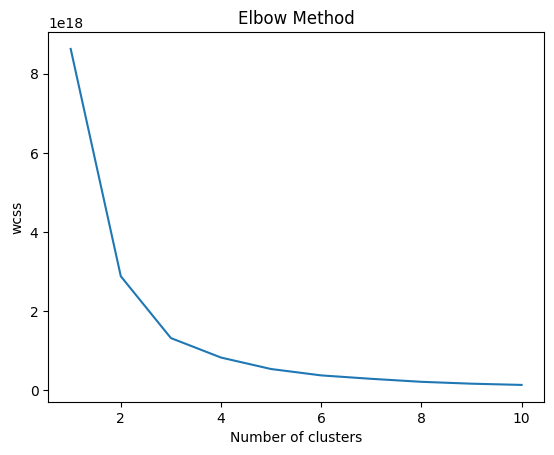

In [ ]:
# find good n_clusters using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(meta_numerical)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


The slope after 5 is more smooth, so we choose 5 to be our number of clusters

In [ ]:
# find outliers using k-means clustering using 95% threshold
import numpy as np
k_means = KMeans(n_clusters=5,random_state=42)
k_means.fit(meta_numerical)

distances = k_means.transform(meta_numerical)

avg_distances=np.mean(distances,axis=1)
threshold = np.percentile(avg_distances,95)
outliers_indices = np.where(avg_distances > threshold)[0]
outliers = meta_numerical.iloc[outliers_indices,:]

print('Number of outliers detected:',len(outliers_indices))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of outliers detected: 268


In [ ]:
print("Before eliminating outliers: ",meta_numerical.shape)
meta_wo_outliers = meta_numerical.drop(outliers_indices,axis=0)
print("After eliminating outliers: ",meta_wo_outliers.shape)

Before eliminating outliers:  (5343, 26)
After eliminating outliers:  (5075, 26)


## Remove low variance features
From the distribution plots, there're some features have low variance and need to be removed

In [ ]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(meta_wo_outliers)
meta_rm_low_variance = meta_wo_outliers[meta_wo_outliers.columns[sel.get_support(indices=True)]]
meta_rm_low_variance.shape

(5075, 20)

## Classify the target
I googled for something for reference
https://www.imdb.com/list/ls076459507/ \
1/10 - ‘Do Not Want’\
2/10 - ‘Awful’\
3/10 - ‘Bad’\
4/10 - ‘Nice Try, But No Cigar’\
5/10 - ‘Meh’\
6/10 - ‘Not Bad’\
7/10 - ‘Good’\
8/10 - ‘Very good’\
9/10 - ‘Excellent’\
10/10 - 'Masterpiece'

In [ ]:
# bad: 0~5; average: 5~7; good: 7~10
from collections import Counter
bins_ref = [0,5,7,10]
labels_ref = [0,1,2]
y = pd.cut(meta_rm_low_variance['vote_average'],bins = bins_ref,labels=labels_ref)
X = meta_rm_low_variance.drop('vote_average',axis=1)
Counter(y)

Counter({2: 1060, 1: 3635, 0: 380})

## Try pipeline for feature engineering
- MinMaxScaler or StandardScaler
- SMOTE or RandomOverSampler
- Evaluate based on precision

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score
from sklearn.model_selection import train_test_split


# split the dataset into train and test set during this test
X_train_pp,X_test_pp,y_train_pp,y_test_pp = train_test_split(X,y,test_size=.2, stratify=y, random_state=42)
# Define pipeline steps
steps = [
    ('scaler', 'passthrough'),     # Placeholder for scaler step
    ('oversampler', 'passthrough'),  # Placeholder for oversampling step
    ('classifier', 'passthrough')     # Placeholder for classifier step
]

# Define parameter grid
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'oversampler': [SMOTE(), RandomOverSampler(), ADASYN()],
    'classifier': [RandomForestClassifier(), SVC(), KNeighborsClassifier(), OneVsOneClassifier(LogisticRegression()), XGBClassifier()]
}

# Create pipeline
pipeline = Pipeline(steps)

# Define evaluation metric
precision_scoring = make_scorer(precision_score, average='macro')

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with pipeline
grid_search_test = GridSearchCV(pipeline, param_grid, cv=cv, scoring = precision_scoring, n_jobs=-1)
grid_search_test.fit(X_train_pp, y_train_pp)

# Get best parameters and best estimator
best_params = grid_search_test.best_params_
best_estimator = grid_search_test.best_estimator_


print("Best Parameters:", best_params)

Best Parameters: {'classifier': RandomForestClassifier(), 'oversampler': RandomOverSampler(), 'scaler': StandardScaler()}


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,belongs_to_collection,budget,runtime,vote_count,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,release_year,release_month
0,1.775677,-0.009391,-1.120419,4.166431,-0.602921,-0.463980,4.018118,1.393567,-0.457066,-0.929383,3.011552,-0.334609,-0.392009,-0.310402,-0.447901,-0.374766,-0.680410,-0.415626,0.889889
1,-0.563166,1.053559,-0.209815,1.502340,-0.602921,2.155264,-0.248873,-0.717583,-0.457066,-0.929383,3.011552,2.988563,-0.392009,-0.310402,-0.447901,-0.374766,-0.680410,-0.415626,1.476940
2,-0.563166,0.901709,2.403221,1.034660,1.658591,-0.463980,-0.248873,-0.717583,2.187870,1.075982,-0.332055,-0.334609,-0.392009,-0.310402,-0.447901,-0.374766,1.469702,-0.415626,1.476940
3,-0.563166,0.840969,0.700788,-0.513921,-0.602921,-0.463980,-0.248873,1.393567,-0.457066,-0.929383,-0.332055,-0.334609,-0.392009,-0.310402,2.232637,-0.374766,-0.680410,-0.415626,1.476940
4,-0.563166,0.142459,-0.130632,-0.484636,1.658591,2.155264,-0.248873,-0.717583,-0.457066,-0.929383,-0.332055,-0.334609,-0.392009,-0.310402,-0.447901,-0.374766,1.469702,-0.415626,1.476940


## oversample
oversampling is typically applied after splitting the dataset to avoid data leakage and ensure unbiased evaluation

the classes are imbalanced, the numbers of bad movies are only 10% of the average ones, so we need to oversample the bad movie class

In [ ]:
# split the dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2, stratify=y, random_state=42) # since the class is imbalanced, set stratify=y to make sure that class distribution is in both sets

In [ ]:
# oversample the train set using randomoversampler;
from imblearn.over_sampling import RandomOverSampler
X_train_resampled,y_train_resampled = RandomOverSampler(random_state=42).fit_resample(X_train,y_train)
Counter(y_train_resampled)

Counter({1: 2908, 2: 2908, 0: 2908})

# Model

Our train set has 9000 rows and 20 features, and the relationships between features are complex.

**Logistic Regression** and **KNN** are good starting points, they are simple and efficient. And can handle multiclass classification tasks well. KNN can be effective with a moderately sized dataset. \

**Random Forest** and **Gradient Boosting** are effective for handling high-dimensional datasets with complex relationships. They are robust to noise and overfitting, making them suitable for multiclass classification tasks with a moderate number of features



Below are the reasons for choosing ovo approach for logistic regression.\
Since I oversampled the class and my training set is not large, so it won't be very computational expensive to choose ovo. I'll choose random forest for feature importance, so I won't count model interpretability on ovr. Besides, ovo trains multiple binary classifiers, which can potentially improve robustness to noisy data or mislabeled instances.

## Select the best performance model yet

In [ ]:
from sklearn.model_selection import cross_validate,StratifiedKFold,cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


logistic_regression = OneVsOneClassifier(LogisticRegression())
knn = KNeighborsClassifier()
svc = SVC()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

models = [logistic_regression, knn, svc, random_forest, xgboost]
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'] # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, scoring= 'roc_auc_ovo', random_state=42)
for model in models:

  cv_results = cross_validate(model,X_train_resampled,y_train_resampled,return_train_score= True,n_jobs=-1,cv=stratified_kfold,scoring=metrics)

  print('Results for', type(model).__name__)
  print('Train Accuracy:', cv_results['train_accuracy'].mean())
  print('Train Precision:', cv_results['train_precision_macro'].mean())
  print('Train Recall:', cv_results['train_recall_macro'].mean())
  print('Train F1 Score:', cv_results['train_f1_macro'].mean())
  print('Test Accuracy:', cv_results['test_accuracy'].mean())
  print('Test Precision:', cv_results['test_precision_macro'].mean())
  print('Test Recall:', cv_results['test_recall_macro'].mean())
  print('Test F1 Score:', cv_results['test_f1_macro'].mean())
  print('\n')




Results for OneVsOneClassifier
Train Accuracy: 0.719939088653599
Train Precision: 0.7183242397332568
Train Recall: 0.7199392824375411
Train F1 Score: 0.7184047106444587
Test Accuracy: 0.7169878552088536
Test Precision: 0.7155154875014482
Test Recall: 0.7169881292474758
Test F1 Score: 0.7154749879914484


Results for KNeighborsClassifier
Train Accuracy: 0.8586085518118006
Train Precision: 0.8644805381214246
Train Recall: 0.8586082996680708
Train F1 Score: 0.8519926882790306
Test Accuracy: 0.7917249152230488
Test Precision: 0.7912407229661423
Test Recall: 0.7917253698150482
Test F1 Score: 0.7798915229875363


Results for SVC
Train Accuracy: 0.821928002591483
Train Precision: 0.8199157564088175
Train Recall: 0.8219279624353192
Train F1 Score: 0.818686743826413
Test Accuracy: 0.7898913672090639
Test Precision: 0.7863657080608626
Test Recall: 0.7898937921543809
Test F1 Score: 0.785032124041535


Results for RandomForestClassifier
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Tr

Random Forest fits well and generalizes well but overfitting, it's the best model but we need to prune it

## Hyperpamameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for hyperparameter tuning
param_grid = {'n_estimators': np.linspace(10,50,5,dtype=int),
        'max_depth': np.linspace(1,10,5,dtype=int),
        'min_samples_leaf':np.linspace(1, int(0.05*len(X_train_resampled)), num = 10, dtype=int), # too low lead to overfitting, 1-5%
        'min_samples_split':np.linspace(2, int(0.05*len(X_train_resampled)), num = 10, dtype=int), # values too low can lead to overly complex trees(overfitting) 2-10% of dataset
        'max_features': np.linspace(0.3,0.5,3,endpoint=True)}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(random_forest, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_max_features = grid_search.best_params_['max_features']

# Train Random Forest classifier with the best hyperparameters
random_forest_best = RandomForestClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, max_features = best_max_features, n_estimators = best_n_estimators)

random_forest_best.fit(X_train_resampled, y_train_resampled)

# Print the results
print('Best n_estimators:', best_n_estimators)
print('Best max_depth:', best_max_depth)
print('Best min_samples_leaf:', best_min_samples_leaf)
print('Best min_samples_split:', best_min_samples_split)
print('Best max_features:', best_max_features)



Best n_estimators: 50
Best max_depth: 10
Best min_samples_leaf: 1
Best min_samples_split: 2
Best max_features: 0.5


In [ ]:
# Evaluate the model using cross-validation on the train set
# While using precision to tune the model, use all metrics to evaluate its performance
cv_results_rf = cross_validate(random_forest_best, X_train_resampled, y_train_resampled, return_train_score= True, n_jobs=-1, cv=stratified_kfold, scoring = metrics)

print('Train Accuracy:', cv_results_rf['train_accuracy'].mean())
print('Train Precision:', cv_results_rf['train_precision_macro'].mean())
print('Train Recall:', cv_results_rf['train_recall_macro'].mean())
print('Train F1 Score:', cv_results_rf['train_f1_macro'].mean())
print('Test Accuracy:', cv_results_rf['test_accuracy'].mean())
print('Test Precision:', cv_results_rf['test_precision_macro'].mean())
print('Test Recall:', cv_results_rf['test_recall_macro'].mean())
print('Test F1 Score:', cv_results_rf['test_f1_macro'].mean())

Train Accuracy: 0.9405949941515089
Train Precision: 0.9422396188486992
Train Recall: 0.9405950779310949
Train F1 Score: 0.9398647035576218
Test Accuracy: 0.884685733813517
Test Precision: 0.887224914188559
Test Recall: 0.8846884839308142
Test F1 Score: 0.8809593881840272


## Final model testing

Accuracy: 0.716256157635468
Precision: 0.593474565142967
Recall: 0.6709871796097651
F1 Score: 0.6125886628043027


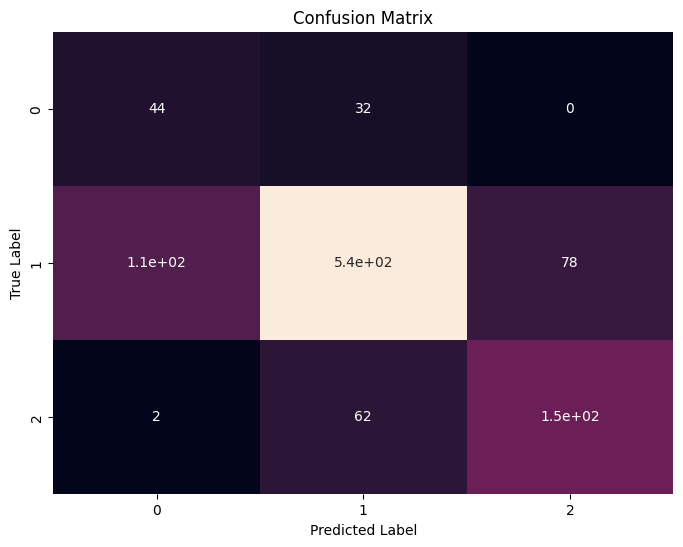

In [ ]:

# Make predictions on the test set
y_pred = random_forest_best.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf,annot=True,cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model interpretability

## Feature Importance

Feature ranking:
1. vote_count : (0.240796)
2. runtime : (0.227220)
3. budget : (0.159245)
4. release_year : (0.121685)
5. Drama : (0.066657)
6. release_month : (0.040675)
7. Animation : (0.017856)
8. belongs_to_collection : (0.017333)
9. Horror : (0.017277)
10. Action : (0.015337)
11. Comedy : (0.011569)
12. Thriller : (0.010498)
13. Adventure : (0.009505)
14. Science Fiction : (0.008259)
15. Fantasy : (0.008251)
16. Crime : (0.007078)
17. Family : (0.007008)
18. Mystery : (0.006909)
19. Romance : (0.006842)


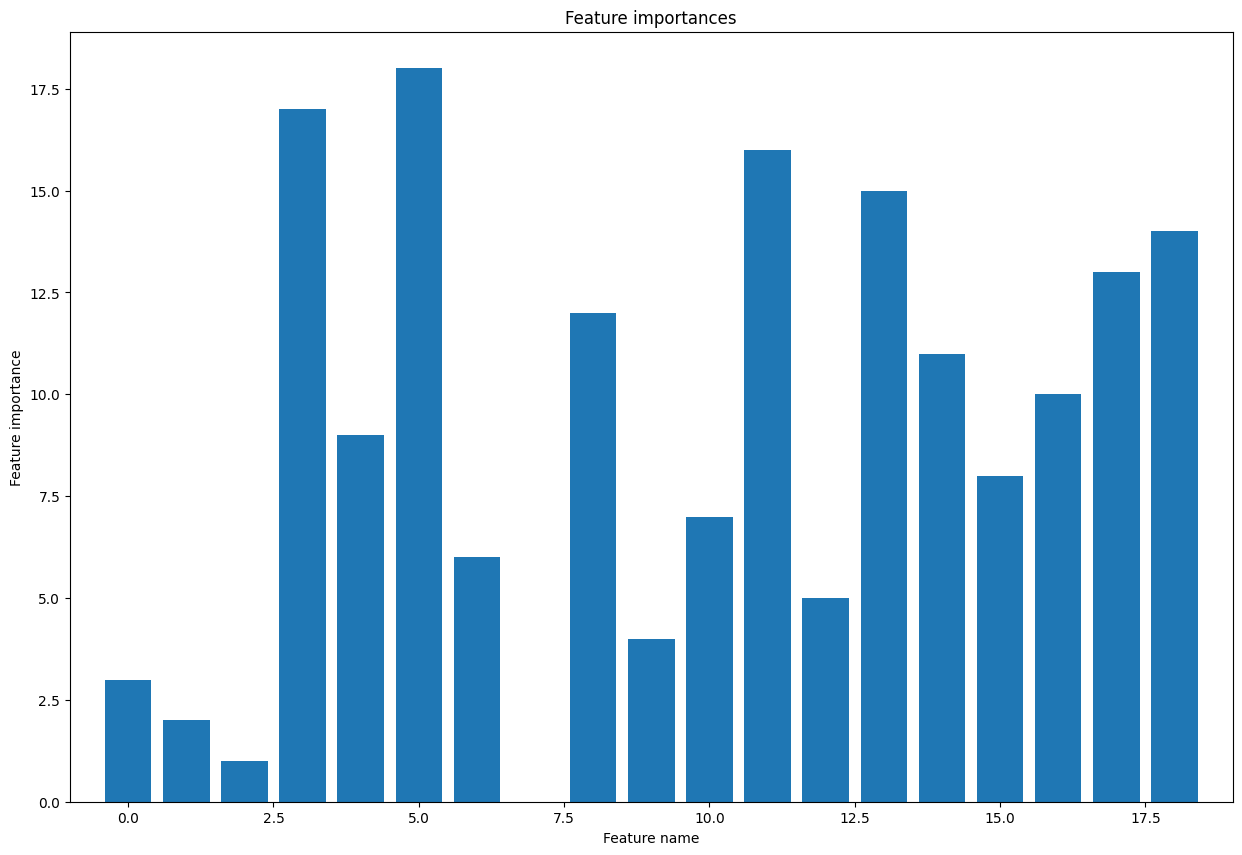

In [ ]:
feature_importances = random_forest_best.feature_importances_
indices = np.argsort(feature_importances)[::-1]
print("Feature ranking:")

for f in range(X_train_resampled.shape[1]):
  print('%d. %s : (%f)' % (f + 1, X_train_resampled.columns[indices[f]], feature_importances[indices[f]] ))

plt.figure(figsize=(15,10))
plt.title('Feature importances')
plt.bar(range(X_train_resampled.shape[1]),indices)
plt.xlim([-1,X_train_resampled.shape[1]])
plt.xlabel('Feature name')
plt.ylabel('Feature importance')
plt.show()

I didn't expect the importance of runtime to be so high

## Confusion matrix for each class

In [ ]:
def split_confusion_matrix(conf_matrix):
    num_classes = conf_matrix.shape[0]
    split_matrices = []

    for i in range(num_classes):
        # Select the rows and columns corresponding to the current class
        class_indices = np.arange(num_classes)
        rows = conf_matrix[i, :]
        cols = conf_matrix[:, i]

        # Create a 2x2 confusion matrix for the current class
        tp = rows[i]
        fn = np.sum(rows) - tp
        fp = np.sum(cols) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp

        split_matrices.append(np.array([[tp, fn], [fp, tn]]))

    return split_matrices

In [ ]:
# Split the confusion matrix into 2x2 matrices for each class
split_matrices = split_confusion_matrix(conf_matrix_rf)

# Print the 2x2 matrices for each class
for i, matrix in enumerate(split_matrices):
    print(f"Confusion matrix for class {i}:")
    print(matrix)
    print()


# Calculate metrics for each class
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Confusion matrix for class 0:
[[ 44  32]
 [116 823]]

Confusion matrix for class 1:
[[535 192]
 [ 94 194]]

Confusion matrix for class 2:
[[148  64]
 [ 78 725]]

              precision    recall  f1-score   support

           0       0.28      0.58      0.37        76
           1       0.85      0.74      0.79       727
           2       0.65      0.70      0.68       212

    accuracy                           0.72      1015
   macro avg       0.59      0.67      0.61      1015
weighted avg       0.77      0.72      0.73      1015



The overall accuracy is acceptable but the precision for bad movies is too low